In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import Ridge#ridge regression both are same use for overfitting and when there is correlation between independent variables
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score,precision_score,roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('vgsales[1].csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [5]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31



# Data Cleaning

In [6]:
df.drop('Rank',axis=1,inplace=True)

In [7]:
df.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
df[df['Year'].isnull()]['Global_Sales'].max()

5.23

In [9]:
df[df['Year'].isnull()]['Global_Sales'].min()
# the null values in year does not have that much sell

0.01

In [10]:
df[df['Year'].isnull()]['Publisher'].value_counts()

Unknown                                   103
Atari                                      16
Warner Bros. Interactive Entertainment     15
Electronic Arts                            12
Konami Digital Entertainment                9
Activision                                  9
Nintendo                                    7
Sega                                        7
Capcom                                      5
Namco Bandai Games                          4
Black Bean Games                            4
Disney Interactive Studios                  4
Vivendi Games                               3
THQ                                         3
Kalypso Media                               3
Ubisoft                                     3
Majesco Entertainment                       2
Ignition Entertainment                      2
Square Enix                                 2
Codemasters                                 2
Midway Games                                2
Focus Home Interactive            

In [11]:
df[df['Year'].isnull()]['Platform'].value_counts()

Wii     35
PS2     34
X360    30
DS      30
PS3     25
XB      21
2600    17
PC      17
PSP     16
GC      14
GBA     11
3DS      9
PS       7
N64      3
GB       1
PSV      1
Name: Platform, dtype: int64

In [12]:
df.sort_values('Year')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6896,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24
2669,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
5366,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
1969,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
1766,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
...,...,...,...,...,...,...,...,...,...,...
16307,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.0,0.00,0.01
16327,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.0,0.00,0.01
16366,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.0,0.00,0.01
16427,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.0,0.00,0.01


In [13]:
df['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [14]:
df.dropna(subset=['Year','Publisher'],how='all',inplace=True)

In [15]:
df.dropna(subset=['Year'],inplace=True)

In [16]:
df.isnull().sum()

Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [17]:
df['Global_Sales'].value_counts()
#df[df['Publisher'].isnull()]['Year'].value_counts()
df[df['Year']==2004]['Publisher'].value_counts()

Electronic Arts                 86
Nintendo                        57
THQ                             49
Activision                      47
Konami Digital Entertainment    42
                                ..
Ghostlight                       1
Tomy Corporation                 1
Deep Silver                      1
Marvelous Interactive            1
DreamCatcher Interactive         1
Name: Publisher, Length: 79, dtype: int64

In [18]:
#df.groupby('Year')['Publisher'].fillna(df.groupby('Year')['Publisher'].transform(lambda x:x.mode()[0]),inplace=True)
df['Publisher'].fillna(df.groupby('Year')['Publisher'].transform(lambda x:x.mode()[0]),inplace=True)


In [19]:
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [20]:
df[df['Publisher'].isnull()]['Year'].value_counts()


Series([], Name: Year, dtype: int64)

In [21]:
df[df['Year']==2004]['Publisher'].value_counts()

Electronic Arts                 105
Nintendo                         57
THQ                              49
Activision                       47
Konami Digital Entertainment     42
                               ... 
Ghostlight                        1
Tomy Corporation                  1
Deep Silver                       1
Marvelous Interactive             1
DreamCatcher Interactive          1
Name: Publisher, Length: 79, dtype: int64

In [22]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# EDA

In [23]:
#How many unique video game titles are included in the dataset?
df.drop_duplicates('Name')['Name'].value_counts()

Wii Sports                                           1
Chou Jigen Game Neptune Mk-II                        1
Wizardry: Tale of the Forsaken Land                  1
Charlotte's Web                                      1
ChuChu Rocket!                                       1
                                                    ..
Operation Flashpoint: Red River                      1
Ninja Blade                                          1
Transformers: Revenge of the Fallen (DS Versions)    1
Fracture                                             1
Know How 2                                           1
Name: Name, Length: 11360, dtype: int64

In [24]:
df['Name'].drop_duplicates().count()

11360

In [25]:
#What are the different genres of video games present in the dataset?
df['Genre'].value_counts()

Action          3253
Sports          2304
Misc            1710
Role-Playing    1471
Shooter         1282
Adventure       1276
Racing          1226
Platform         876
Simulation       851
Fighting         836
Strategy         671
Puzzle           571
Name: Genre, dtype: int64

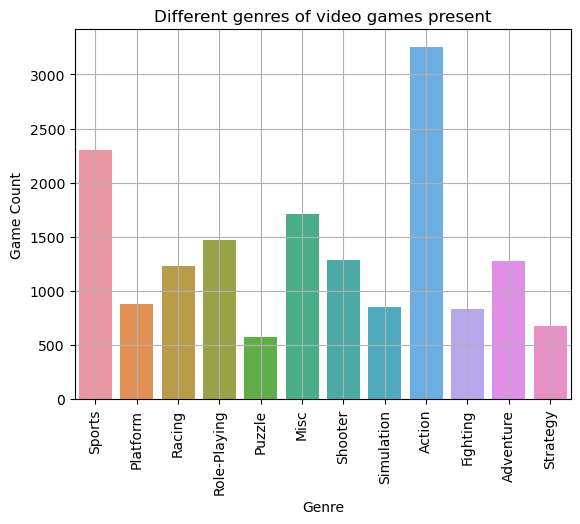

In [26]:
sns.countplot(data=df,x="Genre")
plt.xticks(rotation=90)
plt.title("Different genres of video games present")
plt.ylabel("Game Count")
plt.grid()

In [27]:
#Which platforms have the most video games listed?
df.groupby('Platform')['Name'].count().sort_values(ascending=False)

Platform
DS      2133
PS2     2127
PS3     1304
Wii     1290
X360    1235
PSP     1197
PS      1189
PC       943
GBA      811
XB       803
GC       542
3DS      500
PSV      412
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Name, dtype: int64

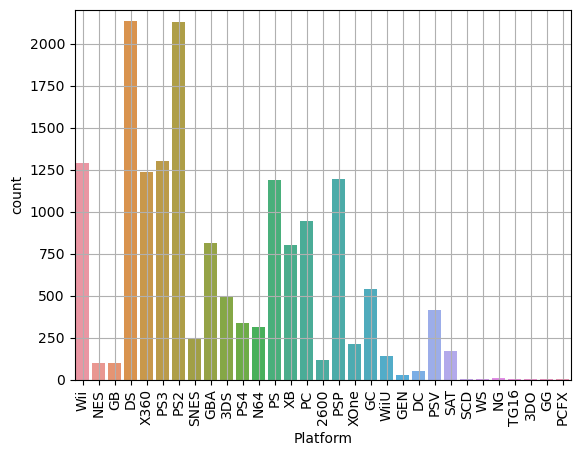

In [28]:
sns.countplot(data=df,x="Platform")
plt.xticks(rotation=90)
plt.ylim(0,2200)
plt.grid()

In [29]:
#What is the distribution of video game sales in the dataset?
df.groupby('Global_Sales')['Name'].value_counts()

Global_Sales  Name                         
0.01          Akatsuki no Goei Trinity         2
              Chaos;Child                      2
              Egg Mania: Eggstreme Madness     2
              Grooverider: Slot Car Thunder    2
              Heart no Kuni no Alice           2
                                              ..
31.37         Pokemon Red/Pokemon Blue         1
33.00         Wii Sports Resort                1
35.82         Mario Kart Wii                   1
40.24         Super Mario Bros.                1
82.74         Wii Sports                       1
Name: Name, Length: 16119, dtype: int64

<Axes: xlabel='Global_Sales', ylabel='Count'>

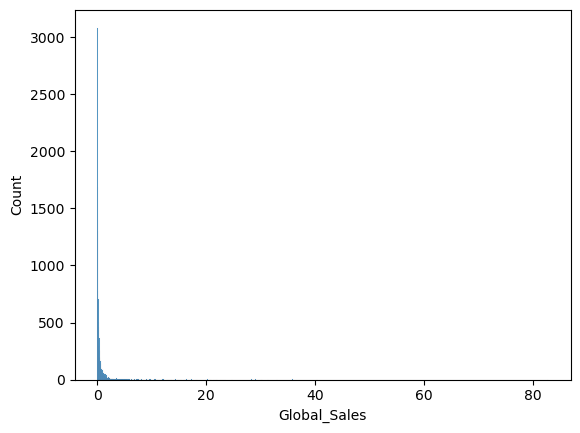

In [30]:
sns.histplot(data=df,x='Global_Sales')

In [31]:
#Which video game platforms have the highest average sales?
df.groupby('Platform')['Global_Sales'].mean().sort_values(ascending=False)

Platform
GB      2.622887
NES     2.561939
GEN     1.050370
SNES    0.837029
PS4     0.827679
X360    0.785109
2600    0.746293
PS3     0.728029
Wii     0.705279
N64     0.690538
XOne    0.662254
PS      0.611766
PS2     0.579906
WiiU    0.572448
3DS     0.492560
GBA     0.386634
DS      0.383947
GC      0.363727
XB      0.313935
SCD     0.311667
DC      0.307115
PC      0.270467
PSP     0.243701
WS      0.236667
SAT     0.194162
PSV     0.149587
NG      0.120000
TG16    0.080000
GG      0.040000
3DO     0.033333
PCFX    0.030000
Name: Global_Sales, dtype: float64

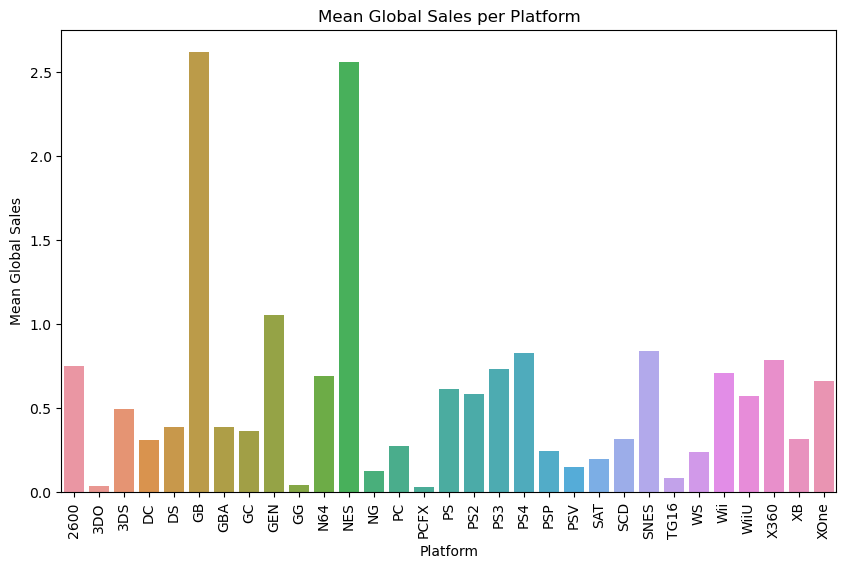

In [32]:
mean_global_sales_per_platform = df.groupby('Platform')['Global_Sales'].mean().reset_index()

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
sns.barplot(x='Platform', y='Global_Sales', data=mean_global_sales_per_platform)

plt.xlabel('Platform')
plt.ylabel('Mean Global Sales')
plt.title('Mean Global Sales per Platform')
plt.xticks(rotation=90)
plt.show()



In [33]:
#Are there any correlations
df.corr()

C:\Users\Noman Traders\AppData\Local\Temp\ipykernel_14628\3091201361.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.091402,1.000000,0.768936,0.451285,0.634508,0.941268
EU_Sales,0.006014,0.768936,1.000000,0.436414,0.726266,0.903271
JP_Sales,-0.169316,0.451285,0.436414,1.000000,0.290653,0.612794
Other_Sales,0.041058,0.634508,0.726266,0.290653,1.000000,0.747974
Global_Sales,-0.074735,0.941268,0.903271,0.612794,0.747974,1.000000


C:\Users\Noman Traders\AppData\Local\Temp\ipykernel_14628\439041765.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


Text(0.5, 1.0, 'Correlation')

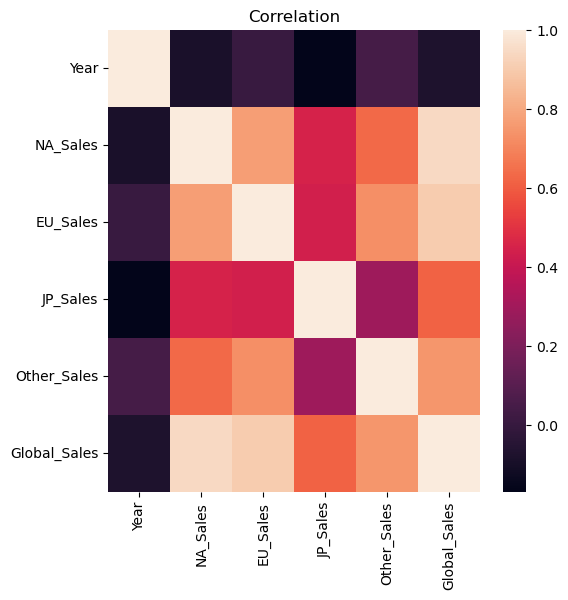

In [34]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr())
plt.title('Correlation')

In [35]:
#Which video games have the highest global sales?
df[df['Global_Sales']==df['Global_Sales'].max()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


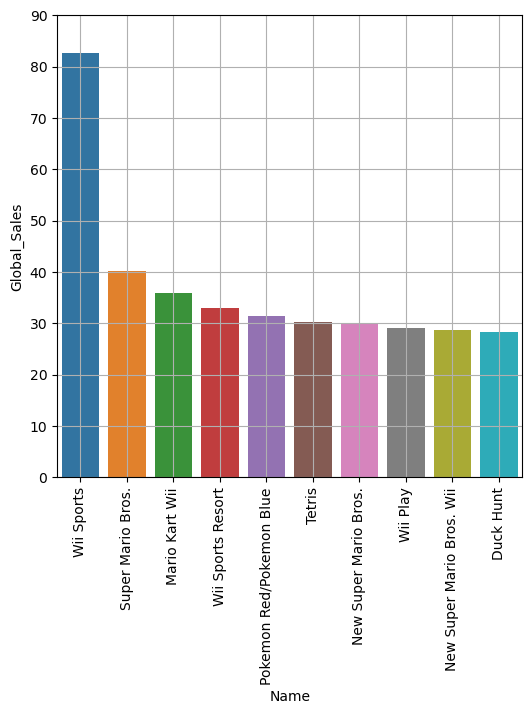

In [36]:

ind=df['Global_Sales'].sort_values(ascending=False).head(10).index
plt.figure(figsize=(6,6))
sns.barplot(x='Name',y='Global_Sales',data=df.iloc[ind])
plt.ylim(0,90)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [37]:
#Which video game genre has the highest number of titles?
df['Genre'].value_counts()

Action          3253
Sports          2304
Misc            1710
Role-Playing    1471
Shooter         1282
Adventure       1276
Racing          1226
Platform         876
Simulation       851
Fighting         836
Strategy         671
Puzzle           571
Name: Genre, dtype: int64

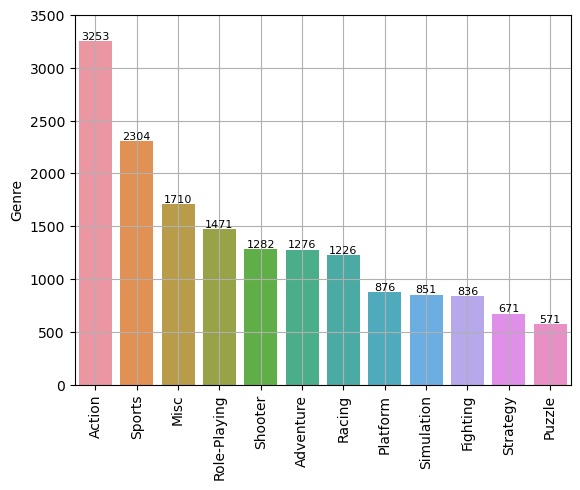

In [38]:
count=df['Genre'].value_counts()
sns.barplot(x=count.index,y=count)
plt.ylim(0,3500)
plt.xticks(rotation=90)
plt.grid()
for i, co in enumerate(count.values):
    plt.text(i, co, str(co), ha='center', va='bottom', fontsize=8)
plt.show()

In [39]:
#What is the average Sales for each video game genre?
df.groupby('Genre')['Global_Sales'].mean()

Genre
Action          0.529628
Adventure       0.184013
Fighting        0.531160
Misc            0.466444
Platform        0.946518
Puzzle          0.424203
Racing          0.592798
Role-Playing    0.628035
Shooter         0.800468
Simulation      0.458472
Sports          0.568247
Strategy        0.258465
Name: Global_Sales, dtype: float64

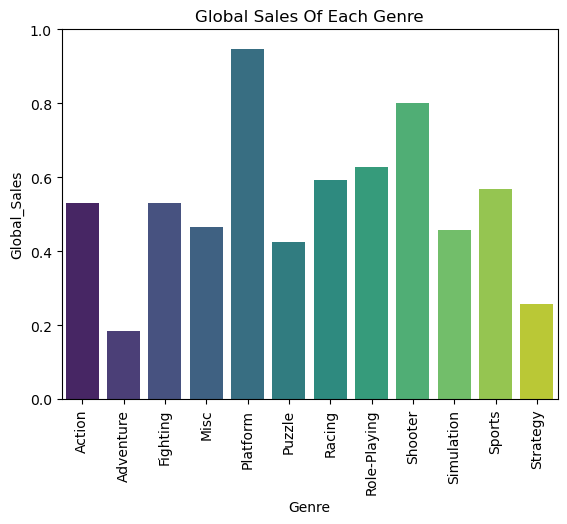

In [40]:
count=df.groupby('Genre')['Global_Sales'].mean()
sns.barplot(x=count.index,y=count,palette='viridis')
plt.xticks(rotation=90)
plt.ylim(0,1)
plt.title('Global Sales Of Each Genre')
plt.show()

In [41]:
#How do the sales numbers vary across different gaming platforms?
df.groupby('Platform')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()

,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,,
2600,86.57,80.78,4.86,0.00,0.84
3DO,0.10,0.00,0.00,0.10,0.00
3DS,246.28,78.03,58.30,97.30,12.55
DC,15.97,5.43,1.69,8.56,0.27
DS,818.96,388.56,194.07,175.02,60.29
GB,254.42,113.64,47.51,85.12,8.16
GBA,313.56,184.12,74.59,46.56,7.61
GC,197.14,131.94,38.32,21.34,5.13
GEN,28.36,19.27,5.52,2.67,0.89


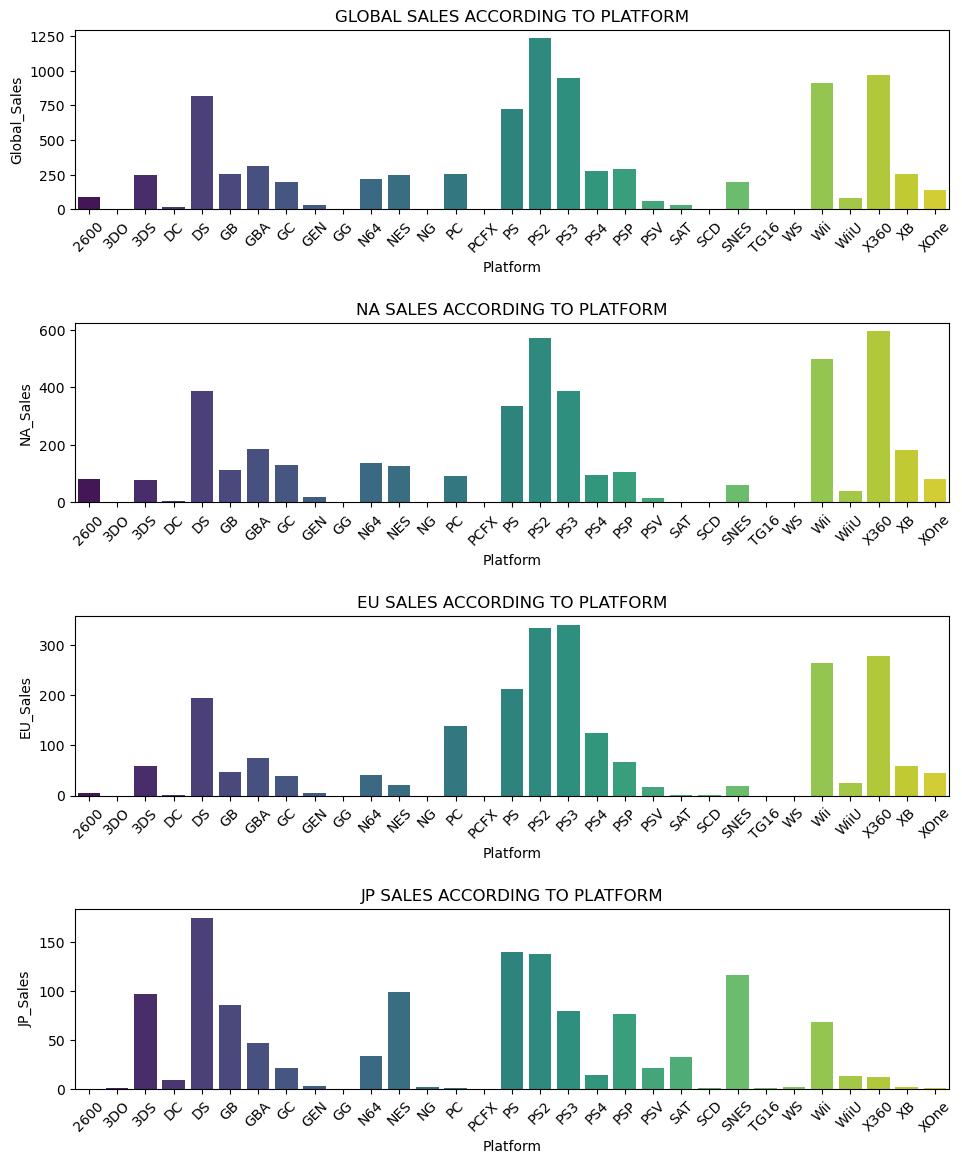

In [42]:
co=df.groupby('Platform')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 12))
sns.barplot(x=co.index,y=co['Global_Sales'],ax=ax[0],palette='viridis')
ax[0].tick_params(axis='x',rotation=45)
ax[0].set_title('GLOBAL SALES ACCORDING TO PLATFORM')

sns.barplot(x=co.index,y=co['NA_Sales'],palette='viridis',ax=ax[1])
ax[1].set_title('NA SALES ACCORDING TO PLATFORM')
ax[1].tick_params(axis='x',rotation=45)

sns.barplot(x=co.index,y=co['EU_Sales'],palette='viridis',ax=ax[2])
ax[2].set_title('EU SALES ACCORDING TO PLATFORM')
ax[2].tick_params(axis='x',rotation=45)

sns.barplot(x=co.index,y=co['JP_Sales'],palette='viridis',ax=ax[3])
ax[3].set_title('JP SALES ACCORDING TO PLATFORM')
ax[3].tick_params(axis='x',rotation=45)

plt.tight_layout(pad=2.0)
plt.show()

In [43]:
#How has the number of video game releases changed over the years?
df.groupby('Year')['Name'].count()

Year
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     763
2005.0     941
2006.0    1008
2007.0    1202
2008.0    1428
2009.0    1431
2010.0    1259
2011.0    1139
2012.0     657
2013.0     546
2014.0     582
2015.0     614
2016.0     344
2017.0       3
2020.0       1
Name: Name, dtype: int64

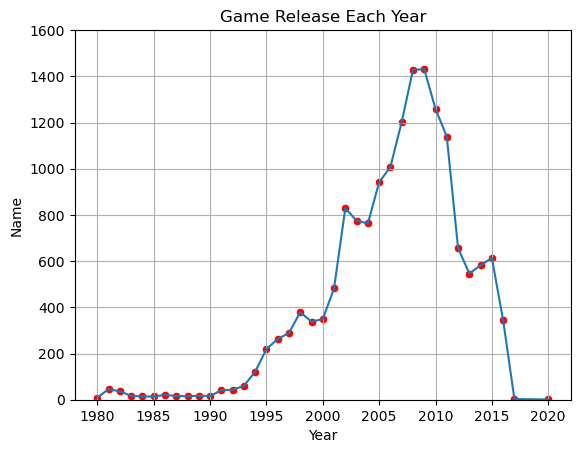

In [44]:
co=df.groupby('Year')['Name'].count()
sns.lineplot(x=co.index,y=co)
sns.scatterplot(x=co.index,y=co,color='red')
plt.title('Game Release Each Year')
plt.ylim(0,1600)
plt.grid()
plt.show()

In [45]:
#Can we identify any specific time periods that have seen significant growth or decline in the video game industry?
#yes from 2000 we see up trend and from 208 we see downfall.

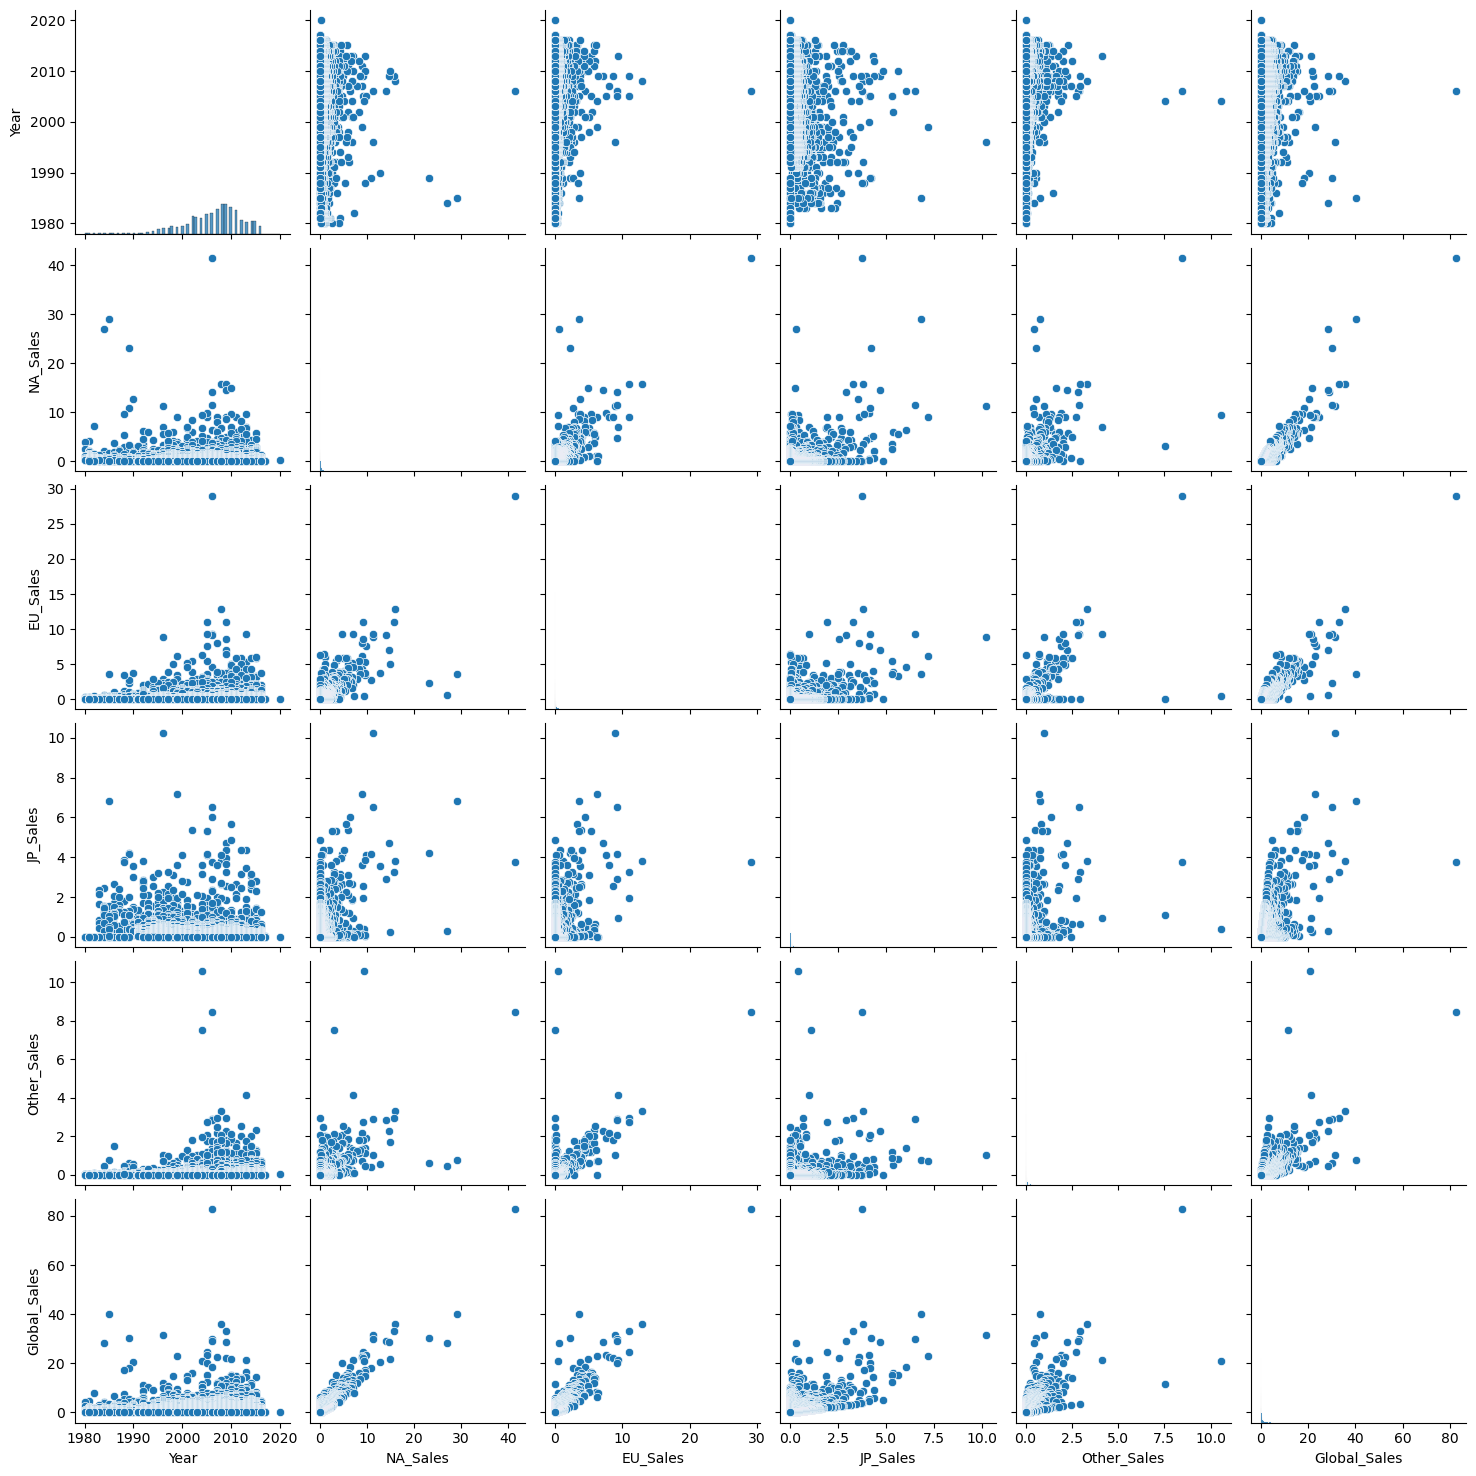

In [46]:
sns.pairplot(data=df)
plt.show()

# MACHINE LEARNING

In [47]:

label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])


In [48]:
df['Genre'].value_counts()

0     3253
10    2304
3     1710
7     1471
8     1282
1     1276
6     1226
4      876
9      851
2      836
11     671
5      571
Name: Genre, dtype: int64

In [49]:
df['Publisher']=label_encoder.fit_transform(df['Publisher'])
df['Platform']=label_encoder.fit_transform(df['Platform'])

In [50]:
df.drop('Name',axis=1,inplace=True)

In [51]:
x=df.drop('Global_Sales',axis=1)
y=df['Global_Sales']

In [52]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.4,random_state=42)

In [53]:
modelLR=LinearRegression()
modelLR.fit(trainx,trainy)

LinearRegression()

In [54]:
y_test_pre=modelLR.predict(testx)

In [55]:
y_train_pre=modelLR.predict(trainx)

In [56]:
print(r2_score(trainy,y_train_pre))

0.9999869307934802


In [57]:
print('Accuracy : ',modelLR.score(testx,testy)*100)

Accuracy :  99.99909615575511


In [58]:
kf=KFold(n_splits=10,random_state=100,shuffle=True)
res=cross_val_score(modelLR,x,y,cv=kf,n_jobs=-1)

In [59]:
print('Accuracy : ',res.mean()*100)

Accuracy :  99.99866745034642


In [60]:
rf=RepeatedKFold(n_repeats=5,n_splits=10,random_state=100)
res1=cross_val_score(modelLR,x,y,cv=rf,n_jobs=-1)
print('Accuracy : ',res1.mean()*100)

Accuracy :  99.99859859582973


In [61]:
modelRL=Ridge(alpha=1.0)
modelRL.fit(trainx,trainy)

Ridge()

In [62]:
y_test_pre_RL=modelRL.predict(testx)
y_train_pre_RL=modelRL.predict(trainx)
print('Accuracy : ',modelRL.score(testx,testy)*100)

Accuracy :  99.99899913007405


In [63]:
print('Accuracy : ',r2_score(trainy,y_train_pre_RL)*100)
print('Accuarcy : ',r2_score(testy,y_test_pre_RL)*100)

Accuracy :  99.99865438915892
Accuarcy :  99.99899913007405


In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have predicted values in 'y_pred' and actual values in 'y_true'

# Mean Absolute Error (MAE)
mae = mean_absolute_error(testy, y_test_pre)
print("MAE:", mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(testy, y_test_pre)
print("MSE:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(testy,y_test_pre, squared=False)
print("RMSE:", rmse)

# R-squared (coefficient of determination)
r2 = r2_score(testy,y_test_pre)
print("R-squared:", r2)     

MAE: 0.002864076621411158
MSE: 2.6661621145574216e-05
RMSE: 0.005163489241353585
R-squared: 0.9999909615575512


### 